Observed Percentages and 95% Confidence Intervals:
None: Observed Percentage = 12.27%, 95% CI = (11.61%, 12.95%)
1-2 people: Observed Percentage = 37.09%, 95% CI = (36.10%, 38.09%)
3-4 people: Observed Percentage = 27.85%, 95% CI = (26.93%, 28.75%)
5+ people: Observed Percentage = 22.79%, 95% CI = (21.91%, 23.65%)


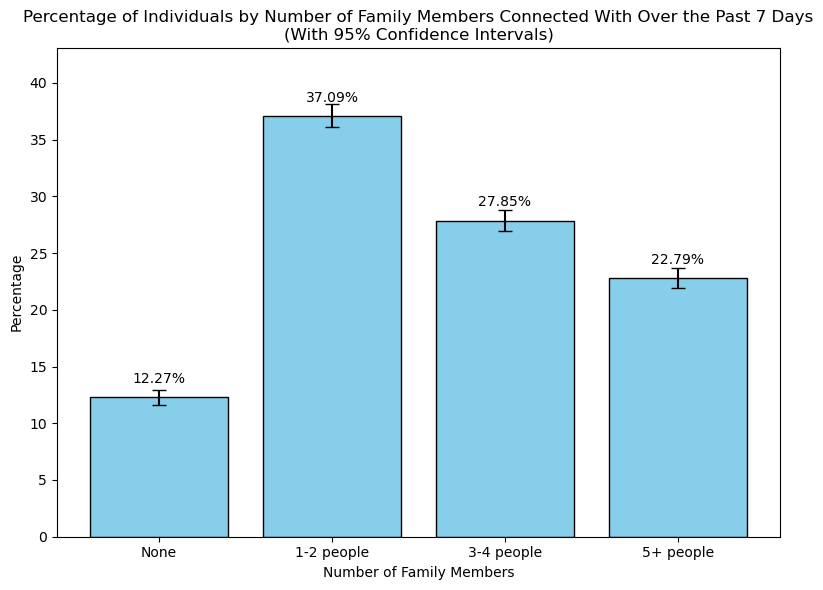

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
counts = np.array([1113, 3363, 2525, 2067])
categories = ['None', '1-2 people', '3-4 people', '5+ people']
total = counts.sum()
observed_proportions = counts / total

# Convert proportions to percentages
observed_percentages = observed_proportions * 100

# Number of bootstrap samples
n_iterations = 10000

# Arrays to store bootstrap percentages
bootstrap_percentages = []

np.random.seed(42)  # For reproducibility

for _ in range(n_iterations):
    # Resample with replacement
    bootstrap_sample = np.random.choice(categories, size=total, replace=True, p=observed_proportions)
    # Get counts in each category
    bootstrap_counts = np.array([np.sum(bootstrap_sample == category) for category in categories])
    # Calculate percentages
    bootstrap_percents = (bootstrap_counts / total) * 100
    bootstrap_percentages.append(bootstrap_percents)

# Convert to numpy array
bootstrap_percentages = np.array(bootstrap_percentages)

# Calculate confidence intervals for each category
confidence_intervals = []
for i in range(len(categories)):
    ci_lower = np.percentile(bootstrap_percentages[:, i], 2.5)
    ci_upper = np.percentile(bootstrap_percentages[:, i], 97.5)
    confidence_intervals.append((ci_lower, ci_upper))

# Print results in percentages
print("Observed Percentages and 95% Confidence Intervals:")
for i, category in enumerate(categories):
    observed_pct = observed_percentages[i]
    ci_lower, ci_upper = confidence_intervals[i]
    print(f"{category}: Observed Percentage = {observed_pct:.2f}%, 95% CI = ({ci_lower:.2f}%, {ci_upper:.2f}%)")

# Prepare error bars for the plot
error_bars = np.array([(observed_percentages[i] - confidence_intervals[i][0],
                        confidence_intervals[i][1] - observed_percentages[i]) for i in range(len(categories))]).T

# Plotting the bar chart with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, observed_percentages, yerr=error_bars, capsize=5, color='skyblue', edgecolor='black')

# Adding labels and title
plt.ylabel('Percentage')
plt.xlabel('Number of Family Members')
plt.title('Percentage of Individuals by Number of Family Members Connected With Over the Past 7 Days\n(With 95% Confidence Intervals)')
plt.ylim(0, max(observed_percentages + error_bars[1]) + 5)

# Adding the exact percentage values on top of each bar
for bar, percentage in zip(bars, observed_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
